In [45]:
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [21]:
df1=pd.read_csv(r"/Users/mohammadehsan/Desktop/emails 2.csv")
df1

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [22]:
df1.head(10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [19]:
X=df1["text"]
y=df1["spam"]

vectorize=TfidfVectorizer(stop_words="english")
X_vectorize=vectorize.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_vectorize,y,test_size=0.2,random_state=42)
print(X_train)
print(y_train)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 406880 stored elements and shape (4582, 36996)>
  Coords	Values
  (0, 32145)	0.028795580637893916
  (0, 9223)	0.030097380860261005
  (0, 18103)	0.024272927660220458
  (0, 36658)	0.04254969805722367
  (0, 5160)	0.17902648976086996
  (0, 14973)	0.03579329525241748
  (0, 28530)	0.13539402085630106
  (0, 8795)	0.03347849476779379
  (0, 426)	0.05226976693183423
  (0, 30257)	0.03458889458110556
  (0, 23878)	0.0607120789034469
  (0, 35257)	0.04204439576633724
  (0, 14883)	0.028555177467080438
  (0, 9979)	0.028713431970634917
  (0, 22220)	0.04180138210587513
  (0, 26971)	0.053519071007064704
  (0, 27889)	0.032948921810938614
  (0, 20622)	0.04071359367376036
  (0, 91)	0.10848896413792576
  (0, 31232)	0.03800598278591726
  (0, 902)	0.04183213605441311
  (0, 1470)	0.0429740114243568
  (0, 31832)	0.04957312691746929
  (0, 25226)	0.26665652447187943
  (0, 4525)	0.0553016820229254
  :	:
  (4581, 26847)	0.11864084739049738
  (4581, 31172)	

In [31]:
model=AdaBoostClassifier(n_estimators=100,random_state=42)
# استفاده کردن داده های X_train,y_train برای داده های مدل 
model.fit(X_train,y_train)
# پیش بینی روی داده های تست 
y_pred=model.predict(X_test)
print(f"accuracy is :{accuracy_score(y_test,y_pred)}")
print(f"classification_report is:{classification_report(y_test,y_pred)}")


accuracy is :0.9616055846422339
classification_report is:              precision    recall  f1-score   support

           0       0.96      0.99      0.97       856
           1       0.96      0.88      0.92       290

    accuracy                           0.96      1146
   macro avg       0.96      0.94      0.95      1146
weighted avg       0.96      0.96      0.96      1146



In [36]:
param_grid={
    "n_estimators":[50,100,200],
    "learning_rate":[0.5,1.0,1.5]
}

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid.fit(X_train,y_train)
best_model=grid.best_estimator_
print("Best parameters found by GridSearchCV:", grid.best_params_)
y_pred = best_model.predict(X_test)
print(f"Accuracy is: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters found by GridSearchCV: {'learning_rate': 1.5, 'n_estimators': 200}
Accuracy is: 0.9817
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.97      0.96      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.98      0.98      0.98      1146



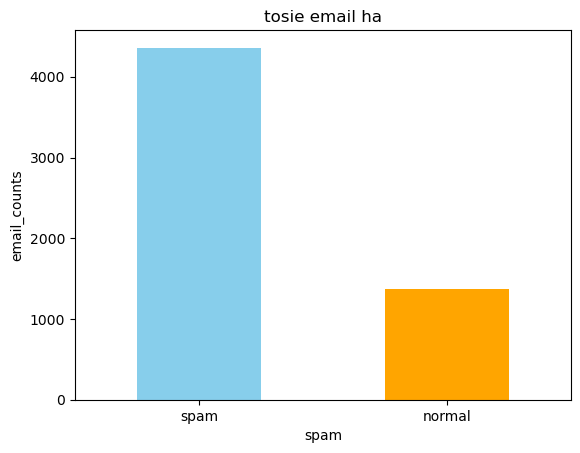

In [50]:
y.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("tosie email ha")
plt.xticks([0,1],["spam","normal"],rotation=0)
plt.ylabel("email_counts")
plt.show()

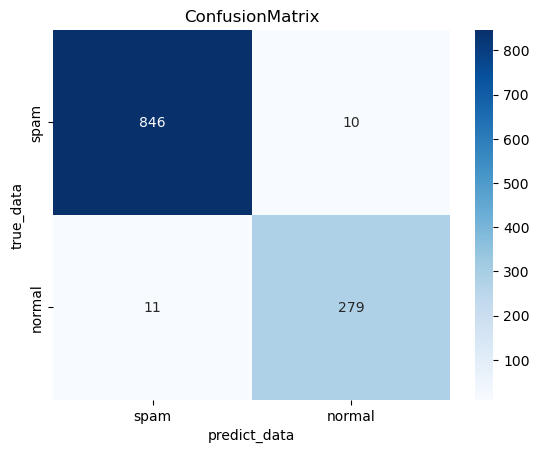

In [54]:
# confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["spam","normal"],yticklabels=["spam","normal"])
plt.xlabel("predict_data")
plt.ylabel("true_data")
plt.title("ConfusionMatrix")
plt.show()
